<a href="https://colab.research.google.com/github/Ayben06/Netflix_Analysis_Report/blob/main/EDA_Netflix_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the relevant libraries


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Data Preprocessing

## Importing the Database

In [106]:
data=pd.read_csv('/content/netflix_titles.csv')

In [107]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Dealing with NaN Values

In [109]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [110]:
data.isnull().sum().sort_values()

show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

In [111]:
data[data['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [112]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [113]:
data=data[data['rating'].notna()]

In [114]:
data[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [115]:
data['duration'] = data['duration'].fillna(data['rating'])

In [116]:
data[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [117]:
data.at[5541,'rating']=data['rating'].mode()[0]
data.at[5794,'rating']=data['rating'].mode()[0]
data.at[5813,'rating']=data['rating'].mode()[0]

In [118]:
data.groupby('type')['country'].agg(pd.Series.mode)

type
Movie      United States
TV Show    United States
Name: country, dtype: object

In [119]:
data['country']=data['country'].fillna(data['country'].mode()[0])

In [120]:
data=data[data['date_added'].notna()]

In [121]:
data=data.drop(columns=['cast','director'])

In [122]:
data.isnull().sum().sort_values()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [123]:
data[['duration', 'min']] = data['duration'].str.split(expand=True, n=1)

In [124]:
data['duration']=pd.to_numeric(data['duration'],errors='coerce')

In [125]:
data.groupby('min')['duration'].mean()

min
Season      1.000000
Seasons     3.294387
min        99.572687
Name: duration, dtype: float64

In [126]:
data['year_added']=data['date_added'].apply(lambda x : x.split(' ')[-1])
data['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [127]:
data['month_added']=data['date_added'].apply(lambda x : x.split(' ')[0])
data['month_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8793, dtype: object

In [128]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [129]:
data['targets_age']=data['rating'].replace(ratings_ages)
data['targets_age'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [130]:
data['prinsipal_country']=data['country'].apply(lambda x : x.split(',')[0])
data['prinsipal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: prinsipal_country, dtype: object

In [131]:
data['type']=pd.Categorical(data['type'])

In [132]:
data['targets_age']=pd.Categorical(data['targets_age'],categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
data['year_added']=pd.to_numeric(data['year_added'])

In [133]:
data.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration                int64
listed_in              object
description            object
min                    object
year_added              int64
month_added            object
targets_age          category
prinsipal_country      object
dtype: object

In [134]:
data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,min,year_added,month_added,targets_age,prinsipal_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min,2021,September,Teens,United States
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Seasons,2021,September,Adults,South Africa
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Season,2021,September,Adults,United States
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Season,2021,September,Adults,United States
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Seasons,2021,September,Adults,India


In [135]:
data['genre']=data['listed_in'].apply(lambda x: x.replace(', ',',').replace(' ,',',').split(','))
data['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [136]:
data_movie=data[data['type']=='Movie']
data_show=data[data['type']=='TV Show']

In [137]:
fig=px.pie(data['type'].value_counts().reset_index(),values='type',names='index')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [138]:
def generete_rating(data):
  rating_data=data.groupby(['rating','targets_age']).agg({'show_id':'count'}).reset_index()
  rating_data=rating_data[rating_data['show_id']!=0]
  rating_data.columns=['rating','targets_age','counts']
  rating_data=rating_data.sort_values('targets_age')
  return rating_data

In [139]:
rating_data=generete_rating(data)
fig=px.bar(rating_data,x='rating',y='counts',color='targets_age')
fig.show()

In [140]:
data_movie_rating=generete_rating(data_movie)
data_show_rating=generete_rating(data_show)

In [141]:
fig=make_subplots(rows=1,cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(labels=data_movie_rating['targets_age'], values=data_movie_rating['counts']),row=1, col=1)

fig.add_trace(go.Pie(labels=data_show_rating['targets_age'],values=data_show_rating['counts']),row=1,col=2)

fig.update_traces(textposition='inside',hole=0.4,hoverinfo='label+percent+name')
fig.update_layout(
    title_text='Rating distribution by Type of content',
    annotations=[dict(text='Movies',x=0.16,y=0.5,font_size=12,showarrow=False),
              dict(text='TV Shows',x=0.82,y=0.5,font_size=12,showarrow=False)])

fig.show()

In [142]:
country_data=data['prinsipal_country'].value_counts().reset_index()
country_data=country_data[country_data['prinsipal_country']/country_data['prinsipal_country'].sum()>0.01]

fig=px.pie(country_data,values='prinsipal_country',names='index')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [143]:
fig=px.histogram(data,x='prinsipal_country')

fig.update_xaxes(categoryorder='total descending')
fig.show()

## Distribution of content released¶

In [144]:
released_year_data=data.loc[data['release_year']>2010].groupby(['release_year','type']).agg({'show_id':'count'}).reset_index()
added_year_data=data.loc[data['year_added']>2010].groupby(['year_added','type']).agg({'show_id':'count'}).reset_index()


In [145]:
fig=go.Figure()

fig.add_trace(go.Scatter(
    x=released_year_data.loc[released_year_data['type']=='Movie']['release_year'],
    y=released_year_data.loc[released_year_data['type']=='Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green'

))

fig.add_trace(go.Scatter(
    x=released_year_data.loc[released_year_data['type']=='TV Show']['release_year'],
    y=released_year_data.loc[released_year_data['type']=='TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen'
))

fig.add_trace(go.Scatter(
    x=added_year_data.loc[added_year_data['type']=='Movie']['year_added'],
    y=added_year_data.loc[added_year_data['type']=='Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='red'
))

fig.add_trace(go.Scatter(
    x=added_year_data.loc[added_year_data['type']=='TV Show']['year_added'],
    y=added_year_data.loc[added_year_data['type']=='TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkred'
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

<ipython-input-146-f79e81402bae>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='release_year'>

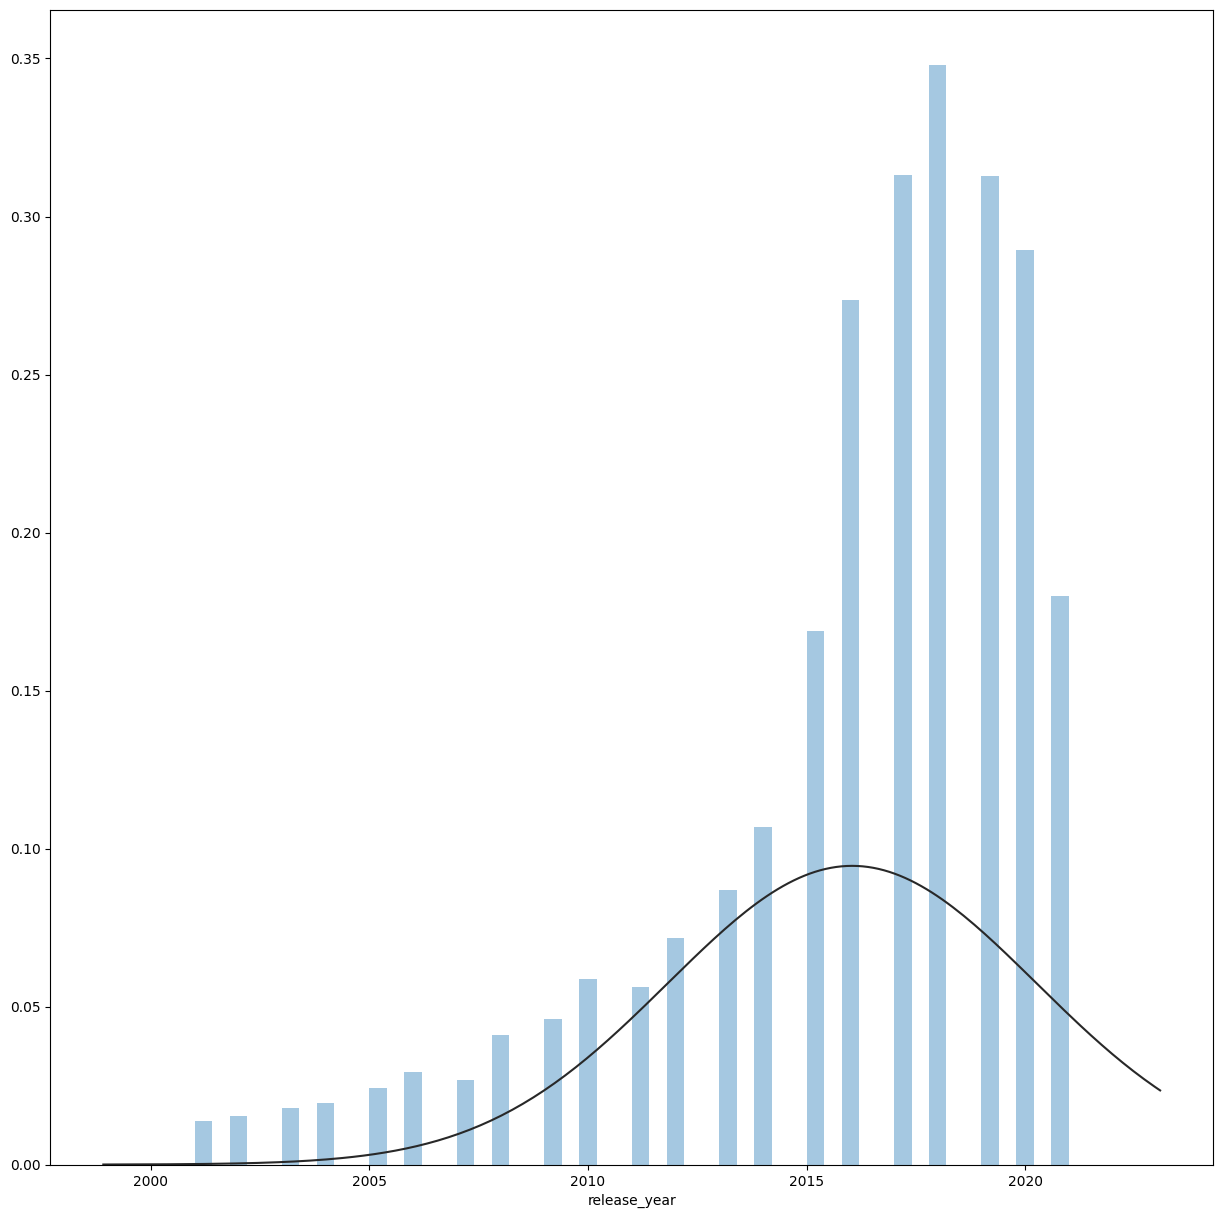

In [146]:
from scipy.stats import norm
sns.distplot(data.loc[data['release_year']>2000,'release_year'],fit=norm,kde=False)

## Genres Analysis

In [147]:
from sklearn.preprocessing import MultiLabelBinarizer

In [148]:
def calculate_mlb(series):
  mlb=MultiLabelBinarizer()
  mlb_data=pd.DataFrame(mlb.fit_transform(series),columns=mlb.classes_,index=series.index)
  return mlb_data

In [149]:
  genres_data=calculate_mlb(data_movie['genre'])
  tdata=genres_data.sum().sort_values(ascending=False)

  fig=go.Figure()
  fig.add_trace(go.Bar (x=tdata.index, y=tdata.values,))

  fig.update_xaxes(categoryorder='total descending')
  fig.update_layout(title='Top Movies Genres')
  fig.show()

<ipython-input-150-795cba2fa627>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



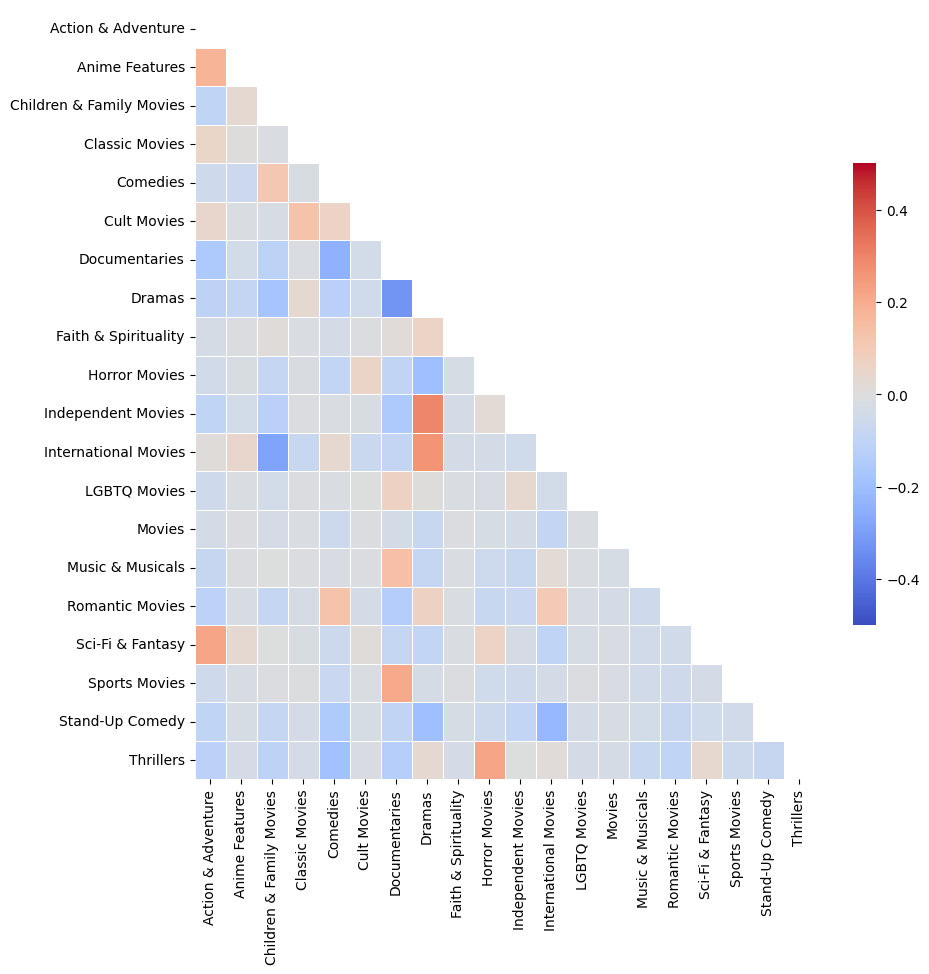

In [150]:
movie_corr=genres_data.corr()
movie_mask=np.zeros_like(movie_corr,dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)]=True
fig,ax=plt.subplots(figsize=(10,10))
pl=sns.heatmap(
    movie_corr,mask=movie_mask,cmap='coolwarm',
    vmax=.5,vmin=-.5,center=0,linewidths=.5,cbar_kws={"shrink": 0.6})

In [151]:
top_movie_genres=tdata[:5]
top_movie_genres

International Movies    2752
Dramas                  2426
Comedies                1674
Documentaries            869
Action & Adventure       859
dtype: int64

In [152]:
  genres_data=calculate_mlb(data_show['genre'])
  tdata=genres_data.sum().sort_values(ascending=False)

  fig=go.Figure()
  fig.add_trace(go.Bar (x=tdata.index, y=tdata.values,))

  fig.update_xaxes(categoryorder='total descending')
  fig.update_layout(title='Top Movies Genres')
  fig.show()

<ipython-input-153-72a6c2d14f64>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



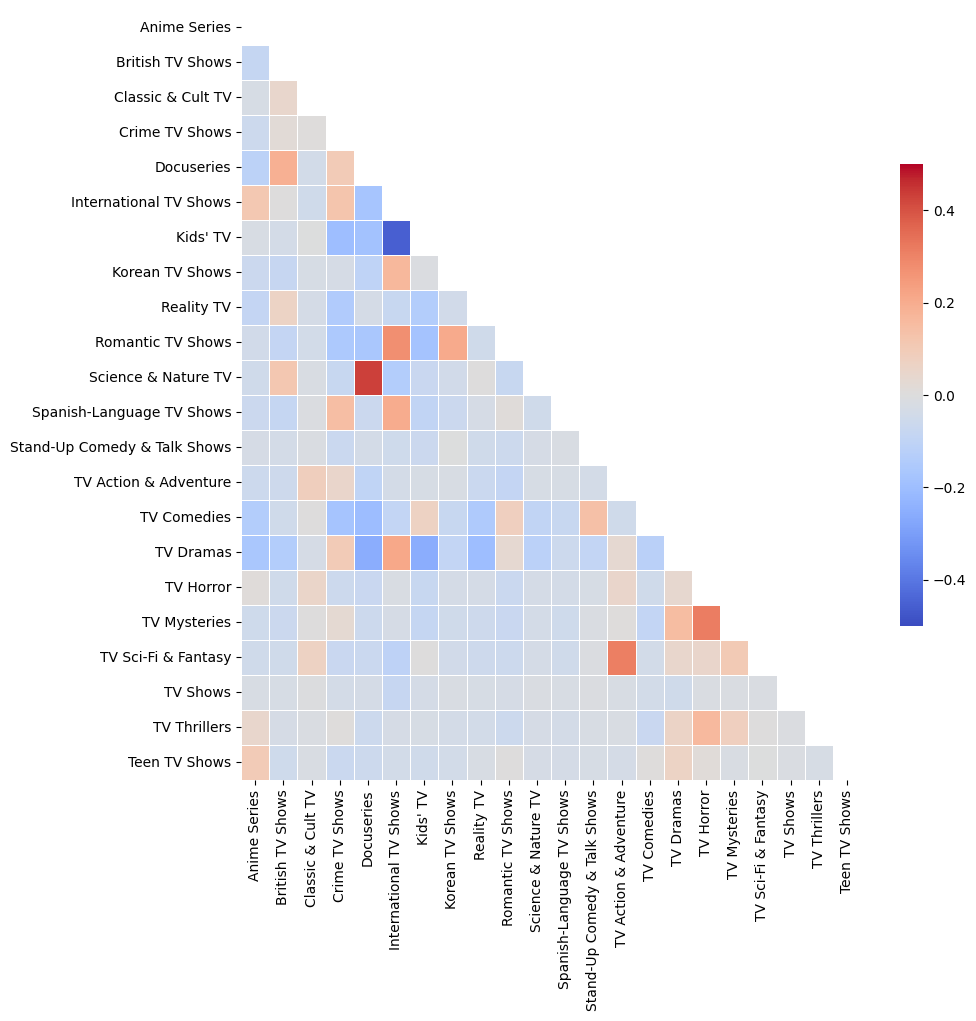

In [153]:
show_corr=genres_data.corr()
show_mask=np.zeros_like(show_corr,dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)]=True
fig, ax= plt.subplots(figsize=(10,10))
pl=sns.heatmap(
    show_corr,mask=show_mask,cmap='coolwarm',vmax=0.5,vmin=-.5,center=0,linewidth=0.5,cbar_kws={'shrink':0.6})

fig.show()

In [154]:
top_show_genres=tdata[:5]
top_show_genres

International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
dtype: int64

### Word cloud

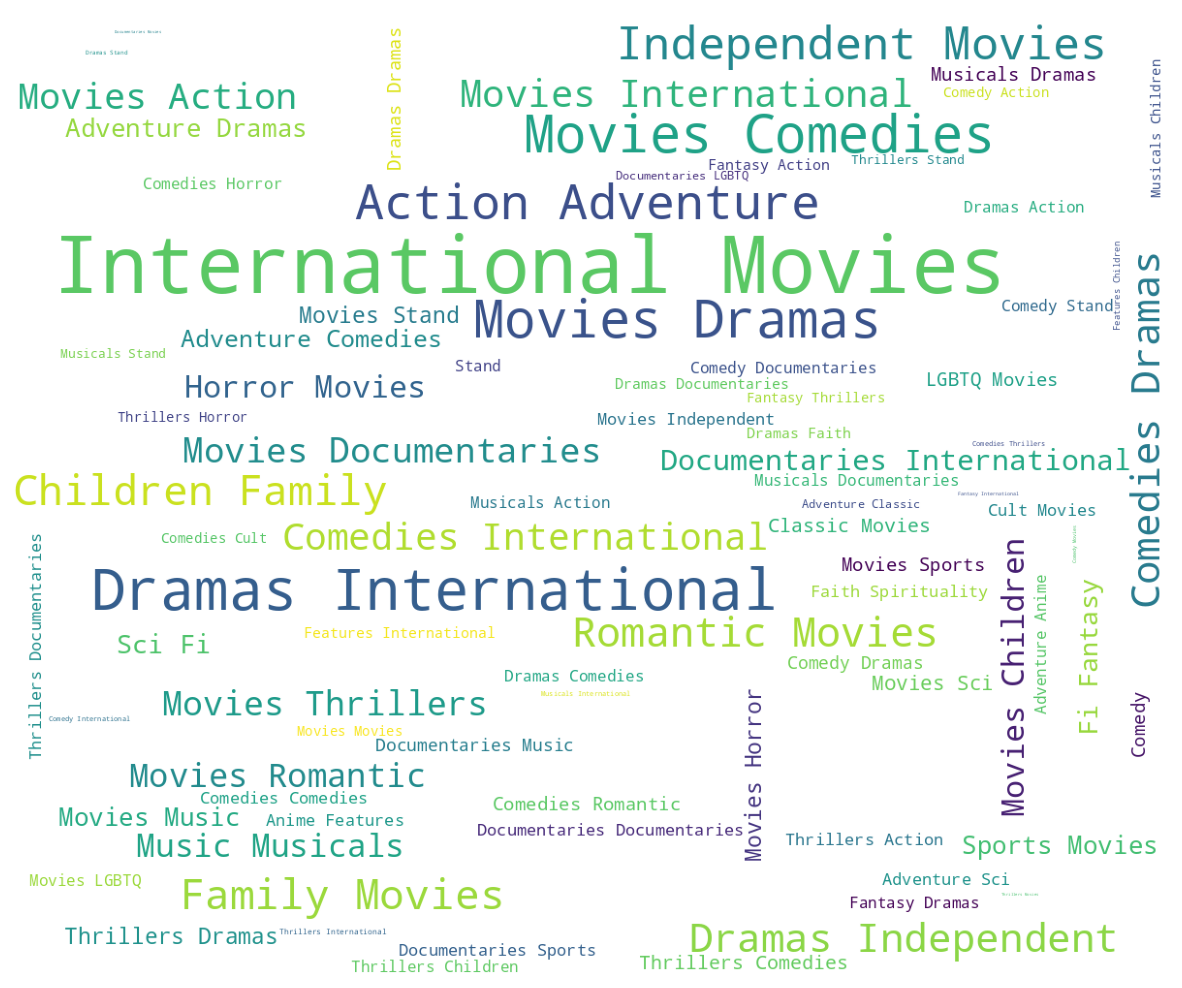

In [155]:
from wordcloud import WordCloud

text=str(list(data_movie['genre'])).replace(',','').replace('[','').replace(']','').replace("'",'')
plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='white',width=1200,height=1000,max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

sd

In [156]:
fig=px.histogram(x=data_show['duration'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title='Distribution of shows duration',xaxis_title='Duration of the Movies')
fig.show()

In [157]:
data_movie.loc[data_movie['duration'].loc[data_movie['duration']<90].index, 'duration_bin']='Less than 1.30'
data_movie.loc[data_movie['duration'].loc[(data_movie['duration']>=90) & (data_movie['duration']<150)].index, 'duration_bin']='More than 1.30-less than 2'
data_movie.loc[data_movie['duration'].loc[data_movie['duration']>=150].index,'duration_bin']='Greater than 2'

In [158]:
data_movie.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,min,year_added,month_added,targets_age,prinsipal_country,genre,duration_bin
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min,2021,September,Teens,United States,[Documentaries],More than 1.30-less than 2
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,September,Older Kids,United States,[Children & Family Movies],More than 1.30-less than 2
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",min,2021,September,Adults,United States,"[Dramas, Independent Movies, International Mov...",More than 1.30-less than 2
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,min,2021,September,Teens,United States,"[Comedies, Dramas]",More than 1.30-less than 2
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,min,2021,September,Adults,Germany,"[Dramas, International Movies]",More than 1.30-less than 2


In [159]:
fig=px.histogram(x=data_movie['duration_bin'],color=data_movie['duration_bin'])

fig.update_xaxes(categoryorder='array',categoryarray=['Less than 1.30','More than 1.30-less than 2','Greater than 2'])

fig.update_layout(title='Distribution of movies duraion',xaxis_title='Duration of Movies')

fig.show()

## Top Genres realese by year

In [160]:
def check_genre_contains(genres,top_genres):
  for genre in genres:
    if genre in top_genres:
      return True
  return False

In [161]:
data_movie['principal_genre']=data_movie['genre'].apply(lambda genre: genre[0])
data_movie['principal_genre'].head()

0                Documentaries
6     Children & Family Movies
7                       Dramas
9                     Comedies
12                      Dramas
Name: principal_genre, dtype: object

In [162]:
data_movie['year_added']

0       2021
6       2021
7       2021
9       2021
12      2021
        ... 
8801    2016
8802    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 6129, dtype: int64

In [178]:
data_year_genre=data_movie[(data_movie['principal_genre'].isin(top_movie_genres.index))&(data_movie['year_added']>=2017)].groupby(['principal_genre','year_added']).agg({'title':'count'})
data_year_genre=data_year_genre.reset_index()
data_year_genre.columns=['principal_genre','year_added','count']

fig=px.sunburst(data_year_genre,path=['year_added','principal_genre'],values='count')
fig.show()
